In [1]:
import numpy as np

x_data = np.random.randn(4)

def makeTdata(n):

    t_data = np.array(
        [np.random.uniform(0.0,0.2),
        np.random.uniform(0.8,1.0),
        np.random.uniform(0.0,0.2),
        np.random.uniform(0.8,1.0)]
        )
    for _ in range(n-1):
        t_data = np.row_stack([t_data,np.array(
            [np.random.uniform(0.0,0.2),
            np.random.uniform(0.8,1.0),
            np.random.uniform(0.0,0.2),
            np.random.uniform(0.8,1.0)]
            )])
    print(t_data.shape)
    return t_data

In [42]:
import torch
from torch.optim import Adam,SGD
from torch.nn import BCELoss,MSELoss
import matplotlib.pyplot as plt

class Discriminator(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.model = torch.nn.Sequential(
            torch.nn.Linear(4,3),
            torch.nn.Sigmoid(),
            torch.nn.Linear(3,1),
            torch.nn.Sigmoid()
        )
        
        self.optimizer = SGD(self.parameters(),lr=0.01)
        self.loss_fn = MSELoss()
        
        self.loss_hist =[]
        self.discriminate_hist = []
        self.num_epoch = 100
 
        # x_data = np.random.randn(100,2)
        # real_data = makeTdata()
        # self.x_data = torch.tensor(x_data,dtype=torch.float32)
        # self.real_data = torch.tensor(real_data,dtype=torch.float32)

    def forward(self,x):
        return self.model(x)

    def train(self,x,target):
        #x에는 fake와 real 섞여 있음

        for epoch in range(1,self.num_epoch+1):
            self.optimizer.zero_grad()
            y_pred = self.model(x)
            loss = self.loss_fn(y_pred,target)
            loss.backward()
            self.optimizer.step()

            self.loss_hist.append(loss.item())
            if epoch%(self.num_epoch//10)==0:
                print(f"epoch {epoch},loss {loss.item():.2f}")
                
                self.discriminate_hist.append(y_pred[0].detach().numpy())

    def visualize(self):
        fig,axs = plt.subplots(1,2,figsize=(8,4))
        axs[0].scatter(np.arange(1,len(self.discriminate_hist)+1),self.discriminate_hist,s=0.5)
        axs[0].set_title('discriminator result')
        axs[1].scatter(np.arange(1,len(self.loss_hist)+1),self.loss_hist,s=0.5)
        axs[1].set_title('discriminator loss')
        plt.show()
        

In [43]:
class Generator(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.model = torch.nn.Sequential(
            torch.nn.Linear(2,3), #2로 받는게 더 다양하게 나올 것 같은데
            torch.nn.Sigmoid(),
            torch.nn.Linear(3,4),
            torch.nn.Sigmoid(),
        )

        self.optimizer = SGD(self.parameters(),lr=0.01)
        self.loss_fn = MSELoss()
        
        self.loss_hist =[]
        self.gen_hist = []
        self.num_epoch = 100
        

    def forward(self,x):
        return self.model(x)

    def train(self,D,x,target):
        # target은 D(fake)의 출력과 shape 같음 (n,1)
        for epoch in range(1,self.num_epoch+1):
            self.optimizer.zero_grad()
            make_fake = self.model(x)
            y_pred = D(make_fake)
            loss = self.loss_fn(y_pred,target)
            loss.backward()
            self.optimizer.step()

            self.loss_hist.append(loss.item())
            if epoch%(self.num_epoch//10)==0:
                print(f"epoch {epoch},loss {loss.item():.2f}")

                self.gen_hist.append(make_fake[0].detach().numpy())

    def visualize(self):
        fig,axs = plt.subplots(1,2,figsize=(8,4))
        for i in range(0,10,1):
            axs[0].scatter(np.array([i+1,i+1,i+1,i+1]),self.gen_hist[(len(self.gen_hist)//10)*(i+1)-1],s=20)
        axs[0].set_title('generator result')
        axs[1].plot(np.arange(1,len(self.loss_hist)+1),self.loss_hist)
        axs[1].set_title('generator loss')
        plt.show()


In [49]:
x_data = np.random.randn(10,2)
real_data = makeTdata(10)
x_data = torch.tensor(x_data,dtype=torch.float32)
real_data = torch.tensor(real_data,dtype=torch.float32)


G = Generator()
D = Discriminator()


fake_data = G(x_data).detach()

fake_pred = D(fake_data)
fake_label = torch.zeros_like(fake_pred,dtype=torch.float32)
real_pred = D(real_data)
real_label= torch.ones_like(real_pred,dtype=torch.float32)

for _ in range(500):
    real_data = makeTdata(10)
    real_data = torch.tensor(real_data,dtype=torch.float32)
    fake_data = G(x_data).detach()
    
    D.train(fake_data,fake_label)
    D.train(real_data,real_label)
    G.train(D,x_data,real_label)


(10, 4)
(10, 4)
epoch 10,loss 0.27
epoch 20,loss 0.26
epoch 30,loss 0.25
epoch 40,loss 0.24
epoch 50,loss 0.23
epoch 60,loss 0.22
epoch 70,loss 0.21
epoch 80,loss 0.21
epoch 90,loss 0.20
epoch 100,loss 0.19
epoch 10,loss 0.31
epoch 20,loss 0.30
epoch 30,loss 0.28
epoch 40,loss 0.27
epoch 50,loss 0.26
epoch 60,loss 0.25
epoch 70,loss 0.24
epoch 80,loss 0.23
epoch 90,loss 0.22
epoch 100,loss 0.21
epoch 10,loss 0.21
epoch 20,loss 0.21
epoch 30,loss 0.21
epoch 40,loss 0.21
epoch 50,loss 0.21
epoch 60,loss 0.21
epoch 70,loss 0.21
epoch 80,loss 0.21
epoch 90,loss 0.21
epoch 100,loss 0.21
(10, 4)
epoch 10,loss 0.28
epoch 20,loss 0.27
epoch 30,loss 0.26
epoch 40,loss 0.25
epoch 50,loss 0.24
epoch 60,loss 0.23
epoch 70,loss 0.22
epoch 80,loss 0.21
epoch 90,loss 0.20
epoch 100,loss 0.20
epoch 10,loss 0.30
epoch 20,loss 0.29
epoch 30,loss 0.27
epoch 40,loss 0.26
epoch 50,loss 0.25
epoch 60,loss 0.24
epoch 70,loss 0.23
epoch 80,loss 0.22
epoch 90,loss 0.21
epoch 100,loss 0.20
epoch 10,loss 0.21
ep

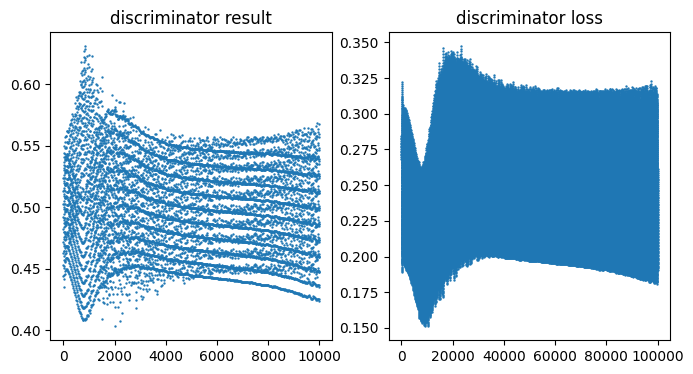

In [50]:
D.visualize()

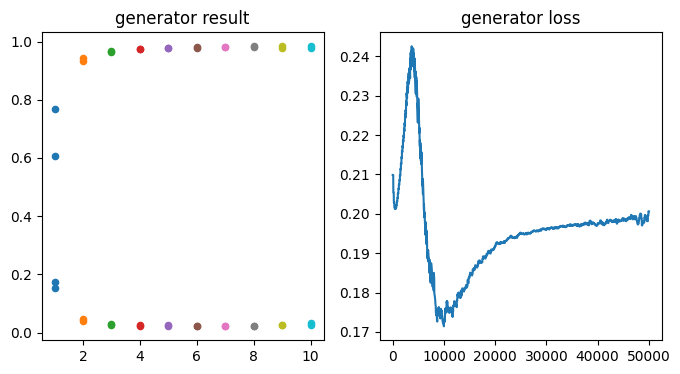

In [51]:
G.visualize()

In [52]:
G.forward(x_data[0:5])

tensor([[0.0329, 0.9773, 0.0276, 0.9836],
        [0.0428, 0.9703, 0.0319, 0.9793],
        [0.0486, 0.9662, 0.0345, 0.9768],
        [0.0305, 0.9793, 0.0253, 0.9852],
        [0.0448, 0.9688, 0.0320, 0.9788]], grad_fn=<SigmoidBackward0>)

In [48]:
print(D(G.forward(x_data[0:5])))
print(D(real_data[0:5]))

tensor([[0.5985],
        [0.6093],
        [0.6033],
        [0.5854],
        [0.6083]], grad_fn=<SigmoidBackward0>)
tensor([[0.5614],
        [0.5568],
        [0.5847],
        [0.6038],
        [0.5795]], grad_fn=<SigmoidBackward0>)


In [129]:
print(G.gen_hist[-1])

[0.01047436 0.94642437 0.01614766 0.97155195]


500


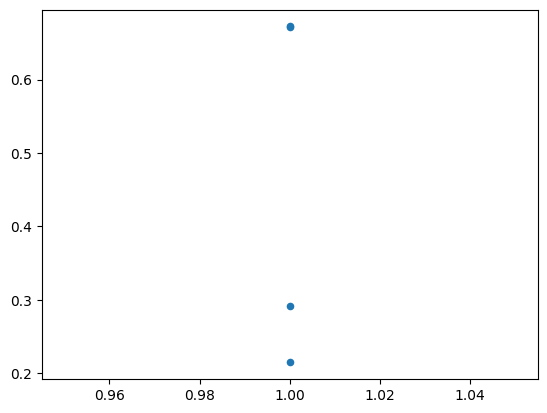

In [44]:
print(len(G.gen_hist))
plt.scatter(np.array([1,1,1,1]),G.gen_hist[-1],s=20)